<a href="https://colab.research.google.com/github/alfir-v10/RushODS_old/blob/main/RUSH_ODS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Предустановка

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
datasets_path = '/content/drive/MyDrive/MyCourses/ODS Rush/mlcourse.ai/data/'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Lesson 1
[Лекция 1](https://www.youtube.com/watch?v=OAy96yiWohk&list=PLVlY_7IJCMJdgcCtQfzj5j8OVB_Y0GJCl&index=1&t=4494s&ab_channel=YuryKashnitsky)

## Повторение основ

In [ ]:
np.set_printoptions(precision=2)

In [ ]:
data = pd.read_csv(datasets_path + 'beauty.csv', sep=';')

In [ ]:
data.head(5)

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      1260 non-null   float64
 1   exper     1260 non-null   int64  
 2   union     1260 non-null   int64  
 3   goodhlth  1260 non-null   int64  
 4   black     1260 non-null   int64  
 5   female    1260 non-null   int64  
 6   married   1260 non-null   int64  
 7   service   1260 non-null   int64  
 8   educ      1260 non-null   int64  
 9   looks     1260 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 98.6 KB


In [ ]:
data.describe()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,18.206349,0.272222,0.933333,0.073810,0.346032,0.691270,0.273810,12.563492,3.185714
std,4.660639,11.963485,0.445280,0.249543,0.261564,0.475892,0.462153,0.446089,2.624489,0.684877
min,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,3.707500,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,3.000000
50%,5.300000,15.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,3.000000
75%,7.695000,27.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,13.000000,4.000000
max,77.720000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,5.000000


In [ ]:
data[(data['female'] == 0) & (data['married'] == 1)].median()

wage         6.71
exper       20.50
union        0.00
goodhlth     1.00
black        0.00
female       0.00
married      1.00
service      0.00
educ        12.00
looks        3.00
dtype: float64

In [ ]:
for look, sub_df in data.groupby("looks"):
    print(look)

    # что угодно
    print(sub_df["goodhlth"].mean())

1
0.8461538461538461
2
0.9366197183098591
3
0.9210526315789473
4
0.9560439560439561
5
1.0


In [ ]:
data.groupby("looks")[['wage', 'exper']].agg(np.mean)

,wage,exper
looks,,
1,4.621538,27.000000
2,5.328803,18.922535
3,6.504598,19.491690
4,6.299341,15.406593
5,7.388421,11.631579


In [ ]:
data.groupby('female')[['looks', 'wage']].agg(np.mean)

,looks,wage
female,,
0,3.177184,7.368823
1,3.201835,4.299358


In [ ]:
pd.crosstab(data['female'], data['married'])

married,0,1
female,,
0,166,658
1,223,213


In [ ]:
pd.crosstab(data['female'], data['looks'])

looks,1,2,3,4,5
female,,,,,
0,8,88,489,228,11
1,5,54,233,136,8


In [ ]:
data['is_rich'] = (data['wage'] < data['wage'].quantile(0.75)).astype('int64')

In [ ]:
data.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks,is_rich
0,5.73,30,0,1,0,1,1,1,14,4,1
1,4.28,28,0,1,0,1,1,0,12,3,1
2,7.96,35,0,1,0,1,0,0,10,4,0
3,11.57,38,0,1,0,0,1,1,16,3,0
4,11.42,27,0,1,0,0,1,0,16,3,0


In [ ]:
def string_gender(female):
  return 'female' if female == 1 else 'male'

In [ ]:
data['female'].apply(string_gender).head()

0    female
1    female
2    female
3      male
4      male
Name: female, dtype: object

In [ ]:
d = {1: 'female', 0: 'male'}

In [ ]:
data['union'].map(d).head(10)

0      male
1      male
2      male
3      male
4      male
5      male
6      male
7    female
8      male
9      male
Name: union, dtype: object

In [ ]:
data['female'].apply(lambda female: 'female' if female == 1 else 'male').head()

0    female
1    female
2    female
3      male
4      male
Name: female, dtype: object

In [ ]:
np.lookfor('create array')

In [ ]:
np.con*?

In [ ]:
?np.array

In [ ]:
salaries = pd.Series([400, 300, 200, 250], index=["Andrew", "Bob", "Charles", "Ann"])

In [ ]:
salaries[salaries > 100]

Andrew     400
Bob        300
Charles    200
Ann        250
dtype: int64

In [ ]:
salaries['Carl'] = np.nan

In [ ]:
salaries

Andrew     400.0
Bob        300.0
Charles    200.0
Ann        250.0
Carl         NaN
dtype: float64

In [ ]:
salaries.median()

275.0

In [ ]:
salaries.fillna(salaries.median(), inplace=True)

In [ ]:
salaries

Andrew     400.0
Bob        300.0
Charles    200.0
Ann        250.0
Carl       275.0
dtype: float64

In [ ]:
np.exp(salaries)

Andrew     5.221470e+173
Bob        1.942426e+130
Charles     7.225974e+86
Ann        3.746455e+108
Carl       2.697631e+119
dtype: float64

In [ ]:
np.random.randn(5, 3)

array([[-1.74,  0.58, -0.6 ],
       [-0.39, -1.54, -0.91],
       [-0.16,  0.35, -0.34],
       [ 0.84, -0.46,  0.06],
       [ 0.07,  0.67, -0.48]])

In [ ]:
df1 = pd.DataFrame(np.random.randn(5, 3), 
                  index=['o1', 'o2', 'o3', 'o4', 'o5'],
                  columns = ['f1', 'f2', 'f3'])

In [ ]:
df1

,f1,f2,f3
o1,0.203320,1.822351,-1.191996
o2,-1.186410,0.173132,-0.691113
o3,0.414298,0.011963,-0.157989
o4,0.025825,-0.351514,0.405886
o5,0.467302,-0.829516,-1.605035


In [ ]:
df2 = pd.DataFrame(
    {"A": np.random.random(5), "B": ["a", "b", "c", "d", "e"], "C": np.arange(5) > 2}
)
df2

,A,B,C
0,0.449294,a,False
1,0.020535,b,False
2,0.617554,c,False
3,0.804555,d,True
4,0.234172,e,True


In [ ]:
df2.at[3, 'A'], df2.at[1, 'C']

(0.8045548713947592, False)

In [ ]:
df2.loc[[1, 3], ['A', 'C']]

,A,C
1,0.020535,False
3,0.804555,True


In [ ]:
df2.at[0, 'A'] = 1

In [ ]:
df2.loc[1] = [0.5, 'f', 'True']

In [ ]:
df2.head()

,A,B,C
0,1.000000,a,False
1,0.500000,f,True
2,0.617554,c,False
3,0.804555,d,True
4,0.234172,e,True


In [ ]:
df1.columns = ['A', 'B', 'C']

In [ ]:
df1

,A,B,C
o1,0.203320,1.822351,-1.191996
o2,-1.186410,0.173132,-0.691113
o3,0.414298,0.011963,-0.157989
o4,0.025825,-0.351514,0.405886
o5,0.467302,-0.829516,-1.605035


In [ ]:
df1.at['o2', 'A'] = np.nan
df1.at['o3', 'B'] = np.nan
df1

,A,B,C
o1,0.203320,1.822351,-1.191996
o2,NaN,0.173132,-0.691113
o3,0.414298,NaN,-0.157989
o4,0.025825,-0.351514,0.405886
o5,0.467302,-0.829516,-1.605035


In [ ]:
df1.isnull()

,A,B,C
o1,False,False,False
o2,True,False,False
o3,False,True,False
o4,False,False,False
o5,False,False,False


In [ ]:
df1.dropna(axis = 1, how='any')

,C
o1,-1.191996
o2,-0.691113
o3,-0.157989
o4,0.405886
o5,-1.605035


In [ ]:
df1.dropna(axis = 0, how='any')

,A,B,C
o1,0.203320,1.822351,-1.191996
o4,0.025825,-0.351514,0.405886
o5,0.467302,-0.829516,-1.605035


In [ ]:
df1.dropna(how='all')

,A,B,C
o1,0.203320,1.822351,-1.191996
o2,NaN,0.173132,-0.691113
o3,0.414298,NaN,-0.157989
o4,0.025825,-0.351514,0.405886
o5,0.467302,-0.829516,-1.605035


In [ ]:
df1.fillna(df1['A'].mean())

,A,B,C
o1,0.203320,1.822351,-1.191996
o2,0.277686,0.173132,-0.691113
o3,0.414298,0.277686,-0.157989
o4,0.025825,-0.351514,0.405886
o5,0.467302,-0.829516,-1.605035


In [ ]:
df = pd.read_csv(datasets_path + 'beauty.csv', sep=';')

In [ ]:
df.sort_values(by="wage", ascending=False).head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
602,77.72,9,1,1,1,1,1,1,13,4
269,41.67,16,0,0,0,0,1,0,13,4
415,38.86,29,0,1,0,0,1,0,13,3
69,32.79,33,0,1,0,0,1,1,16,4
290,31.09,32,0,0,0,0,1,0,13,3


In [ ]:
df.sort_values(by=["wage", 'educ'], ascending=[False, False]).head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
602,77.72,9,1,1,1,1,1,1,13,4
269,41.67,16,0,0,0,0,1,0,13,4
415,38.86,29,0,1,0,0,1,0,13,3
69,32.79,33,0,1,0,0,1,1,16,4
290,31.09,32,0,0,0,0,1,0,13,3


In [ ]:
df.groupby('female')[['educ', 'wage']].agg(np.median)

,educ,wage
female,,
0,12.0,6.41
1,12.0,3.75


In [ ]:
df['goodhlth'].value_counts()

1    1176
0      84
Name: goodhlth, dtype: int64

In [ ]:
df['goodhlth'].mean()

0.9333333333333333

In [ ]:
df[['goodhlth', 'female']].value_counts()

goodhlth  female
1         0         775
          1         401
0         0          49
          1          35
dtype: int64

In [ ]:
df.groupby('female')['goodhlth'].mean()

female
0    0.940534
1    0.919725
Name: goodhlth, dtype: float64

In [ ]:
df[(df["goodhlth"] == 1) & (df["female"] == 1)].head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
8,5.00,5,0,1,0,1,0,0,16,3
9,3.89,12,0,1,0,1,0,0,12,3


In [ ]:
df[df['female'] == 0]['wage'].mean() - df[df['female'] == 1]['wage'].mean()

3.069465017368837

In [ ]:
wage_series = df.groupby('female')['wage'].agg(np.mean)
wage_series[0] - wage_series[1]

3.0694650173688434

In [ ]:
df[(df['exper'] < 10) & (df['union'] == 1)].groupby(by='female')['wage'].max()

female
0    12.82
1    77.72
Name: wage, dtype: float64

In [ ]:
df[(df["female"] == 0) & (df["union"] == 1) & (df["exper"] < 10)]["wage"].max()

12.82

In [ ]:
df.apply(np.mean)

wage         6.306690
exper       18.206349
union        0.272222
goodhlth     0.933333
black        0.073810
female       0.346032
married      0.691270
service      0.273810
educ        12.563492
looks        3.185714
dtype: float64

In [ ]:
df.agg(np.mean)

wage         6.306690
exper       18.206349
union        0.272222
goodhlth     0.933333
black        0.073810
female       0.346032
married      0.691270
service      0.273810
educ        12.563492
looks        3.185714
dtype: float64

In [ ]:
df.groupby('female')[['wage', 'looks']].agg({'wage': [np.mean, np.median, np.max, np.min], 'looks': np.mean})

wage                         looks
            mean median   amax  amin      mean
female                                        
0       7.368823   6.41  41.67  1.05  3.177184
1       4.299358   3.75  77.72  1.02  3.201835

Разница между apply и agg в том, что мы в первом случае может обращаться только по отдельности к кажой группе, тогда как второе позволяет применять функции одновременно и причем разные

In [ ]:
df.groupby('female')[['wage', 'looks']].get_group(0).apply({'wage': [np.mean, np.median, np.max, np.min],'looks': np.mean})

,wage,looks
mean,7.368823,3.177184
median,6.410000,NaN
amax,41.670000,NaN
amin,1.050000,NaN


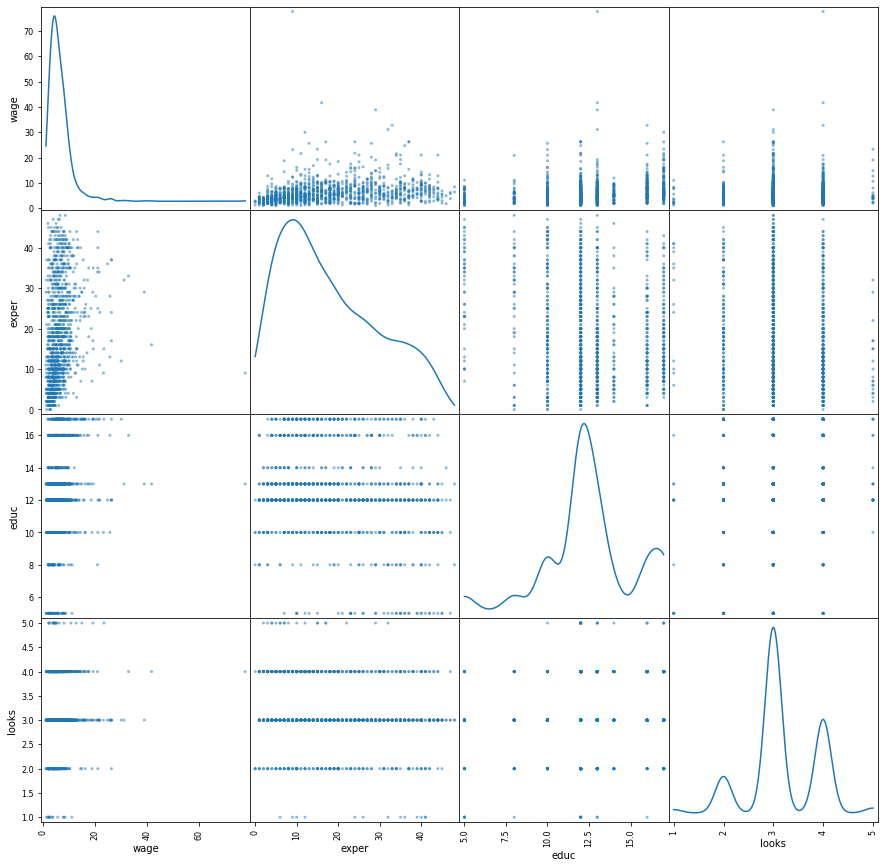

In [ ]:
pd.plotting.scatter_matrix(df[["wage", "exper", "educ", "looks"]], figsize=(15, 15), diagonal="kde")
plt.show()

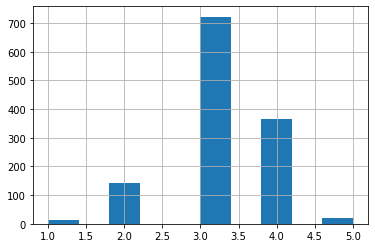

In [ ]:
df["looks"].hist()

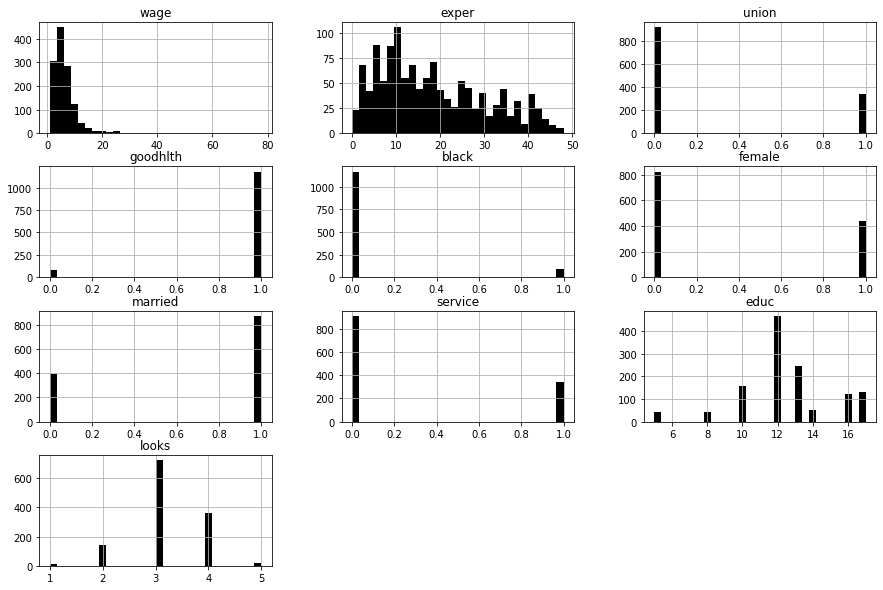

In [ ]:
df.hist(color="k", bins=30, figsize=(15, 10))
plt.show()

## titanic_train

In [ ]:
df_titanic = pd.read_csv(datasets_path+'titanic_train.csv', index_col='PassengerId')

In [ ]:
df_titanic.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_titanic[(df_titanic["Embarked"] == "C") & (df_titanic.Fare > 200)].sort_values(
    by="Fare", ascending=False
).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


In [ ]:
def age_category(age):
    """
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    """
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [ ]:
df_titanic["Age_category"] = df_titanic["Age"].apply(age_category)

In [ ]:
df_titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
df_titanic.groupby('Sex')['Pclass'].value_counts()

Sex     Pclass
female  3         144
        1          94
        2          76
male    3         347
        1         122
        2         108
Name: Pclass, dtype: int64

In [ ]:
df_titanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
from pandas._libs.hashtable import value_count
print(len(df_titanic[(df_titanic['Survived'] == 1) & (df_titanic['Age'] < 30)]) / len(df_titanic[(df_titanic['Age'] < 30)]),
len(df_titanic[(df_titanic['Survived'] == 1) & (df_titanic['Age'] > 60)]) / len(df_titanic[(df_titanic['Age'] > 60)]))

0.40625 0.22727272727272727


In [ ]:
print(df_titanic[df_titanic['Survived'] == 1].groupby('Sex')['Survived'].get_group('female').sum() / df_titanic[df_titanic.Sex == 'female'].shape[0],
      df_titanic[df_titanic['Survived'] == 1].groupby('Sex')['Survived'].get_group('male').sum() / df_titanic[df_titanic.Sex == 'male'].shape[0]).set


0.7420382165605095 0.18890814558058924


In [ ]:
df_titanic['NameFirst'] = df_titanic.Name.apply(lambda x: x.split(',')[1].replace('Mr. ', '').split(' ')[1])

In [ ]:
df_titanic[df_titanic.Sex == 'male']['NameFirst'].value_counts()

Master.     40
William     30
John        21
George      12
Charles     12
            ..
Austen       1
Mitto        1
Jovan        1
Fletcher     1
Johann       1
Name: NameFirst, Length: 272, dtype: int64

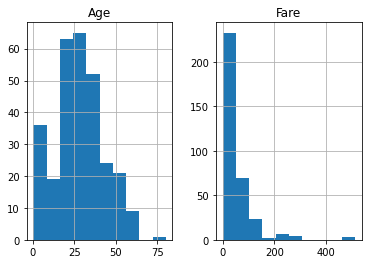

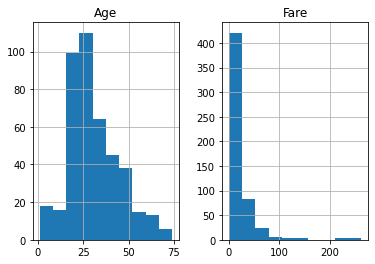

In [ ]:
df_titanic[df_titanic.Survived == 1][['Age', 'Fare']].hist()
df_titanic[df_titanic.Survived == 0][['Age', 'Fare']].hist()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f463c5d0710>,
      dtype=object)

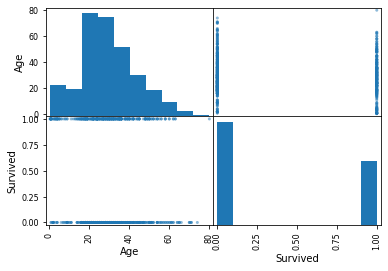

In [ ]:
pd.plotting.scatter_matrix(df_titanic[['Age', 'Survived']])

In [ ]:
df_titanic[df_titanic.Survived == 1]['Age'].mean()

28.343689655172415

In [ ]:
df_titanic[df_titanic.Survived == 0]['Age'].mean()


30.62617924528302

In [ ]:
df_titanic.groupby(['Sex', 'Pclass'])[['Pclass', 'Age']].mean()

Pclass        Age
Sex    Pclass                   
female 1          1.0  34.611765
       2          2.0  28.722973
       3          3.0  21.750000
male   1          1.0  41.281386
       2          2.0  30.740707
       3          3.0  26.507589

## telecom_churn

In [ ]:
df_telecom = pd.read_csv(datasets_path + 'telecom_churn.csv')

In [ ]:
df_telecom.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 50)
pd.set_option("precision", 2)

In [ ]:
df_telecom.shape

(3333, 20)

In [ ]:
df_telecom.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [ ]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
df_telecom["Churn"] = df_telecom["Churn"].astype("int64")

In [ ]:
df_telecom.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56,0.14
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32,0.35
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00,0.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00,0.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00,0.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00,1.00


In [ ]:
df_telecom.describe(include=['object'])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


In [ ]:
df_telecom['Churn'].value_counts() # 0 - лояльный

0    2850
1     483
Name: Churn, dtype: int64

In [ ]:
df_telecom['Area code'].value_counts(normalize=True)

415    0.50
510    0.25
408    0.25
Name: Area code, dtype: float64

In [ ]:
df_telecom["Churn"].mean()

0.14491449144914492

In [ ]:
df_telecom[df_telecom["Churn"] == 1].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Account length            102.66
Area code                 437.82
Number vmail messages       5.12
Total day minutes         206.91
Total day calls           101.34
Total day charge           35.18
Total eve minutes         212.41
Total eve calls           100.56
Total eve charge           18.05
Total night minutes       205.23
Total night calls         100.40
Total night charge          9.24
Total intl minutes         10.70
Total intl calls            4.16
Total intl charge           2.89
Customer service calls      2.23
Churn                       1.00
dtype: float64

In [ ]:
df_telecom[df_telecom["Churn"] == 1]['Total day minutes'].mean()

206.91407867494814

In [ ]:
df_telecom[(df_telecom["Churn"] == 0) & (df_telecom['International plan'] == 'No')]["Total intl minutes"].max()

18.9

In [ ]:
df_telecom[df_telecom['State'].apply(lambda state: state[0] == "W")].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
26,WY,57,408,No,Yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0
44,WI,64,510,No,No,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0
49,WY,97,415,No,Yes,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1


In [ ]:
d = {'No': False, 'Yes': True}
df_telecom['International plan'] = df_telecom['International plan'].map(d)
df_telecom.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [ ]:
df_telecom = df_telecom.replace({'Voice mail plan': d})

In [ ]:
df_telecom.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [ ]:
columns_to_show = ["Total day minutes", "Total eve minutes", "Total night minutes"]

df_telecom.groupby(["Churn"])[columns_to_show].describe(percentiles=[])

Total day minutes                                   Total eve minutes  \
                  count    mean    std  min    50%    max             count   
Churn                                                                         
0                2850.0  175.18  50.18  0.0  177.2  315.6            2850.0   
1                 483.0  206.91  69.00  0.0  217.6  350.8             483.0   

                                         Total night minutes                 \
         mean    std   min    50%    max               count    mean    std   
Churn                                                                         
0      199.04  50.29   0.0  199.6  361.8              2850.0  200.13  51.11   
1      212.41  51.73  70.9  211.3  363.7               483.0  205.23  47.13   

                            
        min     50%    max  
Churn                       
0      23.2  200.25  395.0  
1      47.4  204.80  354.9

In [ ]:
df_telecom.groupby(["Churn"])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

Total day minutes                    Total eve minutes               \
                   mean    std amin   amax              mean    std  amin   
Churn                                                                       
0                175.18  50.18  0.0  315.6            199.04  50.29   0.0   
1                206.91  69.00  0.0  350.8            212.41  51.73  70.9   

             Total night minutes                      
        amax                mean    std  amin   amax  
Churn                                                 
0      361.8              200.13  51.11  23.2  395.0  
1      363.7              205.23  47.13  47.4  354.9

In [ ]:
pd.crosstab(df_telecom["Churn"], df_telecom["International plan"])

International plan,False,True
Churn,,
0,2664,186
1,346,137


In [ ]:
pd.crosstab(df_telecom["Churn"], df_telecom["Voice mail plan"], normalize=True)

Voice mail plan,False,True
Churn,,
0,0.60,0.25
1,0.12,0.02


In [ ]:
df_telecom.pivot_table(["Total day calls", "Total eve calls", "Total night calls"],
    ["Area code"],
    aggfunc="mean").head(10)

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.50,99.79,99.04
415,100.58,100.50,100.40
510,100.10,99.67,100.60


In [ ]:
df_telecom.groupby('Area code')["Total day calls", "Total eve calls", "Total night calls"].agg(np.mean)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.50,99.79,99.04
415,100.58,100.50,100.40
510,100.10,99.67,100.60


In [ ]:
total_calls = df_telecom["Total day calls"] + df_telecom["Total eve calls"] + df_telecom["Total night calls"] + df_telecom["Total intl calls"]

In [ ]:
df_telecom.insert(loc=len(df_telecom.columns), column='Total calls', value=total_calls)

In [ ]:
df_telecom

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,False,True,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0,292
3329,WV,68,415,False,False,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0,239
3330,RI,28,510,False,False,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0,264
3331,CT,184,510,True,False,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0,336


In [ ]:
df_telecom["Total charge"] = (df_telecom["Total day charge"] + df_telecom["Total eve charge"] + df_telecom["Total night charge"] + df_telecom["Total intl charge"])
df_telecom.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls,Total charge
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303,75.56
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332,59.24
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333,62.29
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255,66.80
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359,52.09


In [ ]:
df_telecom = df_telecom.drop(["Total charge", "Total calls"], axis=1)

In [ ]:
df_telecom.drop([1, 2]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,True,False,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,510,False,True,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [ ]:
plt.rcParams["figure.figsize"] = (8, 6)

In [ ]:
pd.crosstab(df_telecom["Churn"], df_telecom["International plan"], margins=True)

International plan,False,True,All
Churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


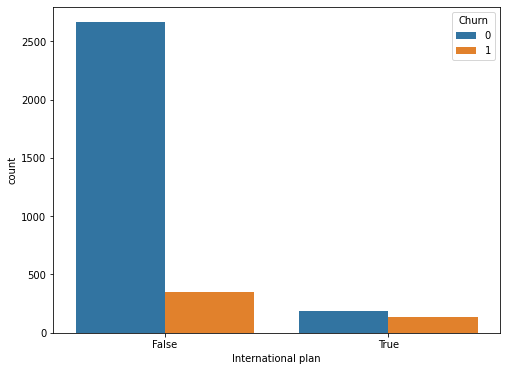

In [ ]:
sns.countplot(x='International plan', hue='Churn', data=df_telecom)
plt.savefig("int_plan_and_churn.png", dpi=300);

In [ ]:
pd.crosstab(df_telecom.Churn, df_telecom['Customer service calls'], margins=True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


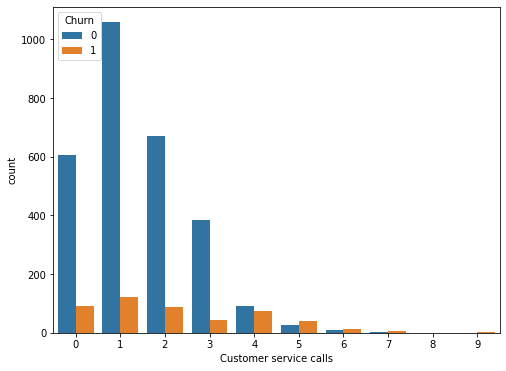

In [ ]:
sns.countplot(x='Customer service calls', hue='Churn', data=df_telecom)
plt.savefig("serv_calls__and_churn.png", dpi=300);

In [ ]:
df_telecom["Many_service_calls"] = (df_telecom["Customer service calls"] > 3).astype("int")

pd.crosstab(df_telecom["Many_service_calls"], df_telecom["Churn"], margins=True)

Churn,0,1,All
Many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


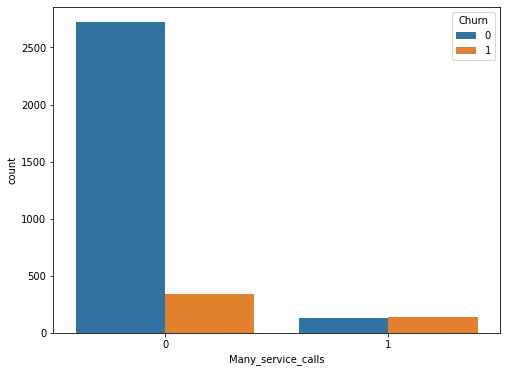

In [ ]:
sns.countplot(x='Many_service_calls', hue='Churn', data=df_telecom)
plt.savefig("serv_calls__and_churn.png", dpi=300);

In [ ]:
pd.crosstab(df_telecom['Many_service_calls'] & df_telecom['International plan'], df_telecom['Churn'])

Churn,0,1
row_0,,
False,2841,464
True,9,19


# Lesson 2

In [436]:
df_telecom = pd.read_csv(datasets_path + 'telecom_churn.csv')

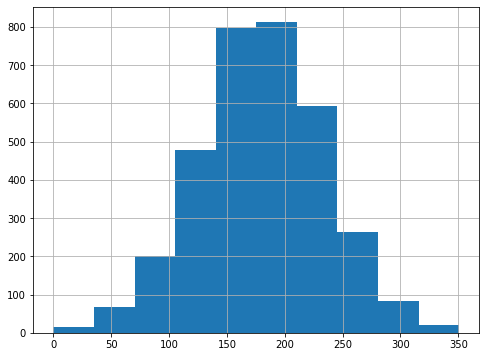

In [437]:
df_telecom['Total day minutes'].hist();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


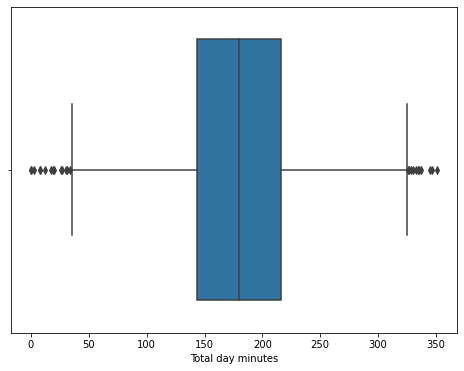

In [438]:
sns.boxplot(df_telecom['Total day minutes']);

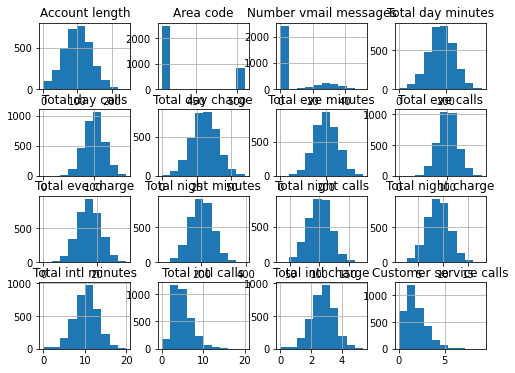

In [439]:
df_telecom.hist();

In [440]:
df_telecom['State'].value_counts()

WV    106
MN     84
NY     83
AL     80
WI     78
     ... 
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, Length: 51, dtype: int64

In [441]:
df_telecom['Churn'].value_counts().head()


False    2850
True      483
Name: Churn, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


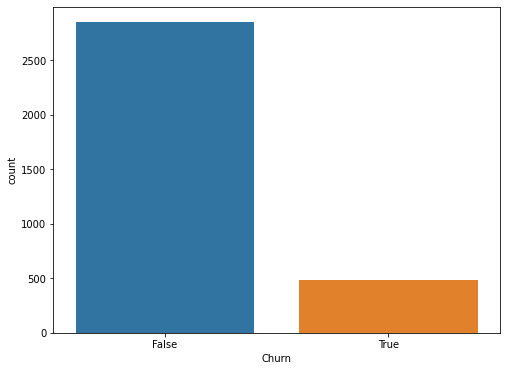

In [442]:
sns.countplot(df_telecom['Churn']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


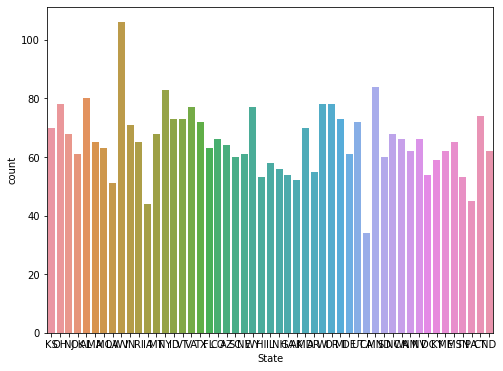

In [443]:
sns.countplot(df_telecom['State']);


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


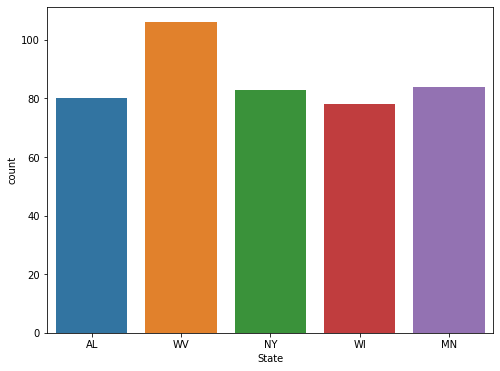

In [444]:
sns.countplot(df_telecom[df_telecom['State'].isin(df_telecom['State'].value_counts().head().index)]['State']);

In [445]:
feat = [f for f in df_telecom.columns if 'charge' in f]
feat

['Total day charge',
 'Total eve charge',
 'Total night charge',
 'Total intl charge']

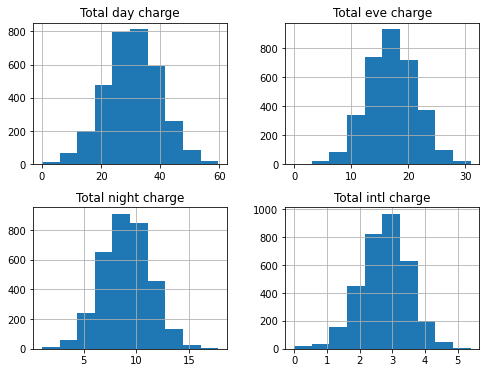

In [446]:
df_telecom[feat].hist();

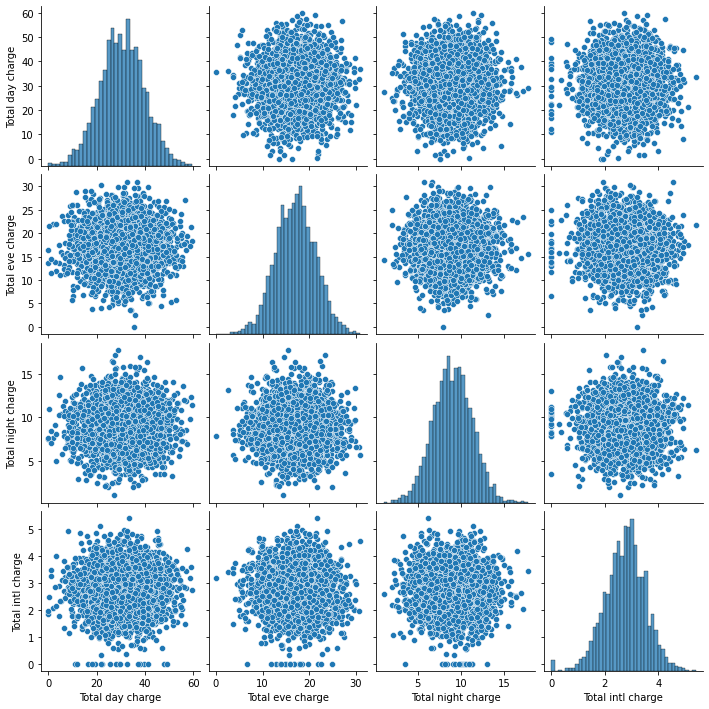

In [447]:
sns.pairplot(df_telecom[feat]);

In [453]:
df_telecom['Churn'] = df_telecom['Churn'].map({False: 0, True: 1})

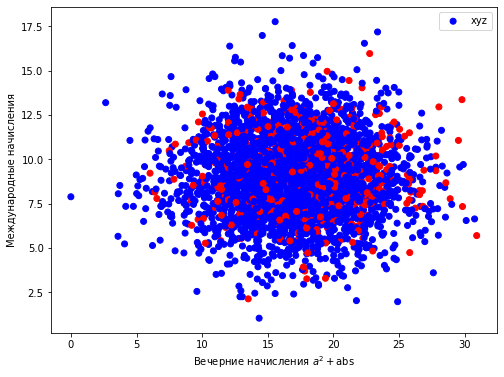

In [478]:
plt.scatter(df_telecom['Total eve charge'], 
            df_telecom['Total night charge'], 
            color=df_telecom['Churn'].map({0: 'blue', 1: 'red'}),
            label='xyz');
plt.xlabel('Вечерние начисления $a^2 + $abs'); #LaTex
plt.ylabel('Международные начисления');
plt.legend();

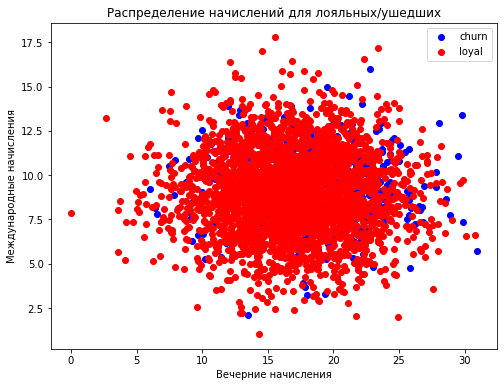

In [486]:
plt.scatter(df_telecom[df_telecom['Churn'].map({0:False, 1:True})]['Total eve charge'],
            df_telecom[df_telecom['Churn'].map({0:False, 1:True})]['Total night charge']
            , color = 'blue', label='churn');
plt.scatter(df_telecom[~df_telecom['Churn'].map({0:False, 1:True})]['Total eve charge'],
            df_telecom[~df_telecom['Churn'].map({0:False, 1:True})]['Total night charge']
            , color = 'red', label='loyal');
plt.xlabel('Вечерние начисления');
plt.ylabel('Международные начисления');
plt.title('Распределение начислений для лояльных/ушедших');
plt.legend();

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,1
33,AZ,12,408,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,1
41,MD,135,408,Yes,Yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,CA,84,415,No,No,0,280.0,113,47.60,202.2,90,17.19,156.8,103,7.06,10.4,4,2.81,0,1
3304,IL,71,510,Yes,No,0,186.1,114,31.64,198.6,140,16.88,206.5,80,9.29,13.8,5,3.73,4,1
3320,GA,122,510,Yes,No,0,140.0,101,23.80,196.4,77,16.69,120.1,133,5.40,9.7,4,2.62,4,1
3322,MD,62,408,No,No,0,321.1,105,54.59,265.5,122,22.57,180.5,72,8.12,11.5,2,3.11,4,1


In [ ]:
df_telecom[df_telecom['Churn'].map({0: False, 1:True})]

In [491]:
df_telecom.corr()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.00e+00,-1.25e-02,-4.63e-03,6.22e-03,3.85e-02,6.21e-03,-6.76e-03,1.93e-02,-6.75e-03,-8.96e-03,-1.32e-02,-8.96e-03,9.51e-03,2.07e-02,9.55e-03,-3.80e-03,1.65e-02
Area code,-1.25e-02,1.00e+00,-1.99e-03,-8.26e-03,-9.65e-03,-8.26e-03,3.58e-03,-1.19e-02,3.61e-03,-5.82e-03,1.65e-02,-5.85e-03,-1.83e-02,-2.42e-02,-1.84e-02,2.76e-02,6.17e-03
Number vmail messages,-4.63e-03,-1.99e-03,1.00e+00,7.78e-04,-9.55e-03,7.76e-04,1.76e-02,-5.86e-03,1.76e-02,7.68e-03,7.12e-03,7.66e-03,2.86e-03,1.40e-02,2.88e-03,-1.33e-02,-8.97e-02
Total day minutes,6.22e-03,-8.26e-03,7.78e-04,1.00e+00,6.75e-03,1.00e+00,7.04e-03,1.58e-02,7.03e-03,4.32e-03,2.30e-02,4.30e-03,-1.02e-02,8.03e-03,-1.01e-02,-1.34e-02,2.05e-01
Total day calls,3.85e-02,-9.65e-03,-9.55e-03,6.75e-03,1.00e+00,6.75e-03,-2.15e-02,6.46e-03,-2.14e-02,2.29e-02,-1.96e-02,2.29e-02,2.16e-02,4.57e-03,2.17e-02,-1.89e-02,1.85e-02
Total day charge,6.21e-03,-8.26e-03,7.76e-04,1.00e+00,6.75e-03,1.00e+00,7.05e-03,1.58e-02,7.04e-03,4.32e-03,2.30e-02,4.30e-03,-1.02e-02,8.03e-03,-1.01e-02,-1.34e-02,2.05e-01
Total eve minutes,-6.76e-03,3.58e-03,1.76e-02,7.04e-03,-2.15e-02,7.05e-03,1.00e+00,-1.14e-02,1.00e+00,-1.26e-02,7.59e-03,-1.26e-02,-1.10e-02,2.54e-03,-1.11e-02,-1.30e-02,9.28e-02
Total eve calls,1.93e-02,-1.19e-02,-5.86e-03,1.58e-02,6.46e-03,1.58e-02,-1.14e-02,1.00e+00,-1.14e-02,-2.09e-03,7.71e-03,-2.06e-03,8.70e-03,1.74e-02,8.67e-03,2.42e-03,9.23e-03
Total eve charge,-6.75e-03,3.61e-03,1.76e-02,7.03e-03,-2.14e-02,7.04e-03,1.00e+00,-1.14e-02,1.00e+00,-1.26e-02,7.60e-03,-1.26e-02,-1.10e-02,2.54e-03,-1.11e-02,-1.30e-02,9.28e-02
Total night minutes,-8.96e-03,-5.82e-03,7.68e-03,4.32e-03,2.29e-02,4.32e-03,-1.26e-02,-2.09e-03,-1.26e-02,1.00e+00,1.12e-02,1.00e+00,-1.52e-02,-1.24e-02,-1.52e-02,-9.29e-03,3.55e-02


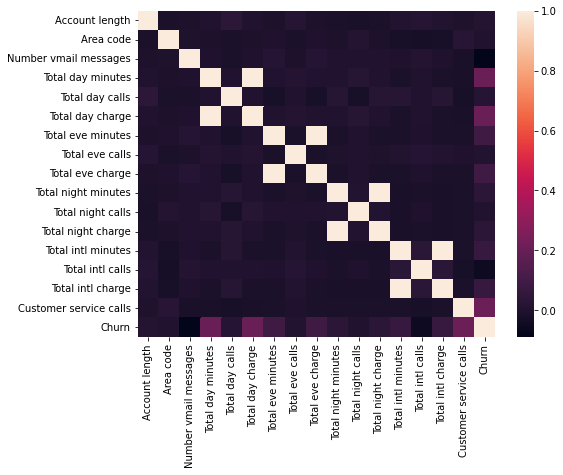

In [488]:
sns.heatmap(df_telecom.corr())

In [490]:
df_telecom.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [495]:
df_telecom.drop(feat, axis=1, inplace=True)

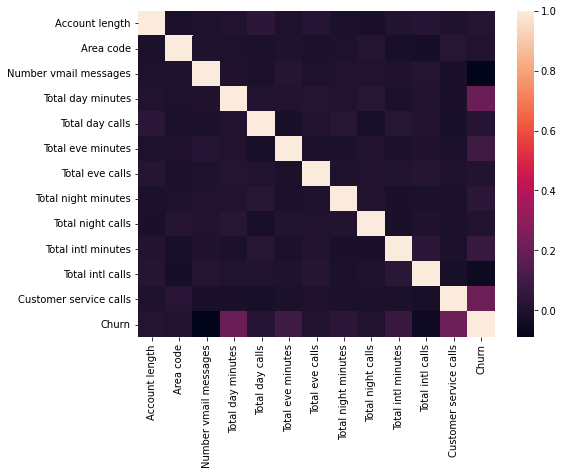

In [496]:
sns.heatmap(df_telecom.corr())

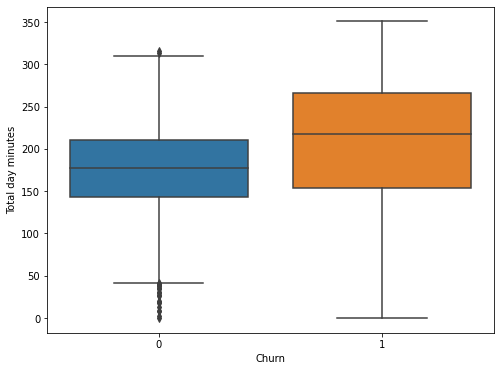

In [498]:
sns.boxplot(x='Churn', y='Total day minutes', data=df_telecom);

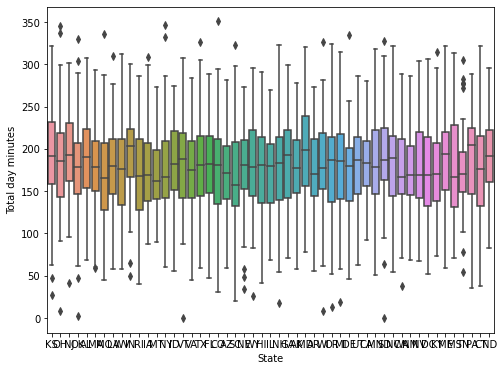

In [500]:
sns.boxplot(x='State', y='Total day minutes', data=df_telecom);

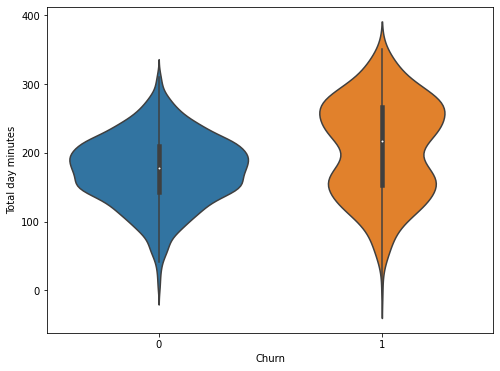

In [501]:
sns.violinplot(x="Churn", y="Total day minutes", data=df_telecom);

In [502]:
df_telecom.groupby('International plan')['Total day minutes'].mean()

International plan
No     178.89
Yes    187.99
Name: Total day minutes, dtype: float64

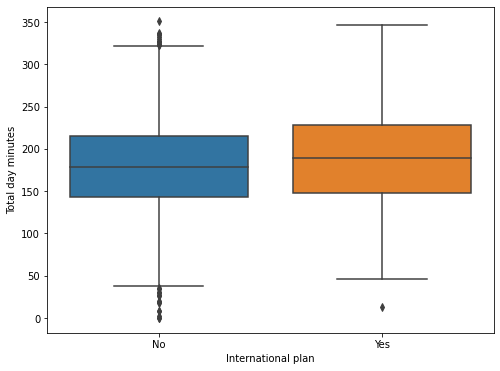

In [504]:
sns.boxplot(x='International plan', y='Total day minutes', data=df_telecom);

In [505]:
pd.crosstab(df_telecom['Churn'], df_telecom['International plan'])

International plan,No,Yes
Churn,,
0,2664,186
1,346,137


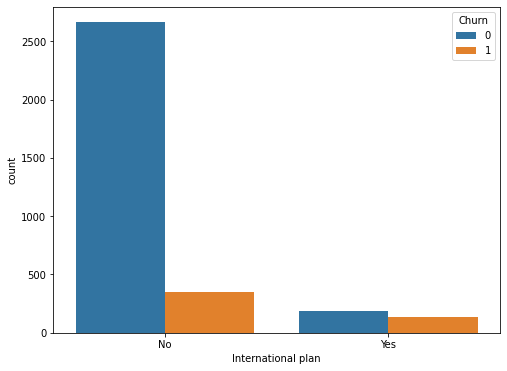

In [507]:
sns.countplot(x='International plan', hue='Churn', data=df_telecom);

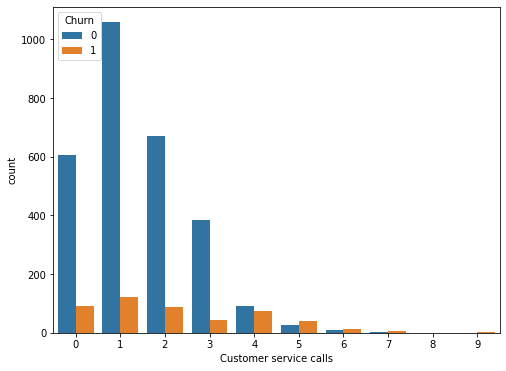

In [508]:
sns.countplot(x='Customer service calls', hue='Churn', data=df_telecom);


In [511]:
from sklearn.manifold import TSNE

In [544]:
tsne = TSNE()

In [545]:
df_telecom_2 = df_telecom.drop(['State'], axis=1)

In [546]:
df_telecom_2["International plan"] = df_telecom_2["International plan"].map({"Yes": 1, "No": 0})
df_telecom_2["Voice mail plan"] = df_telecom_2["Voice mail plan"].map({"Yes": 1, "No": 0})

In [547]:
df_telecom_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          3333 non-null   int64  
 1   Area code               3333 non-null   int64  
 2   International plan      3333 non-null   int64  
 3   Voice mail plan         3333 non-null   int64  
 4   Number vmail messages   3333 non-null   int64  
 5   Total day minutes       3333 non-null   float64
 6   Total day calls         3333 non-null   int64  
 7   Total eve minutes       3333 non-null   float64
 8   Total eve calls         3333 non-null   int64  
 9   Total night minutes     3333 non-null   float64
 10  Total night calls       3333 non-null   int64  
 11  Total intl minutes      3333 non-null   float64
 12  Total intl calls        3333 non-null   int64  
 13  Customer service calls  3333 non-null   int64  
 14  Churn                   3333 non-null   

In [548]:
tsne.fit(df_telecom_2)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


CPU times: user 1min, sys: 234 ms, total: 1min 1s
Wall time: 36.3 s


TSNE()

In [ ]:
dir(tsne)

In [550]:
tsne.embedding_.shape

(3333, 2)

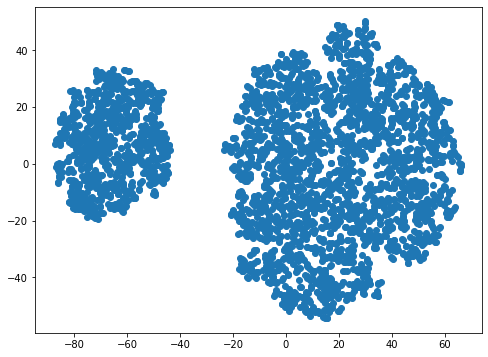

In [551]:
plt.scatter(tsne.embedding_[:, 0], tsne.embedding_[:, 1]);

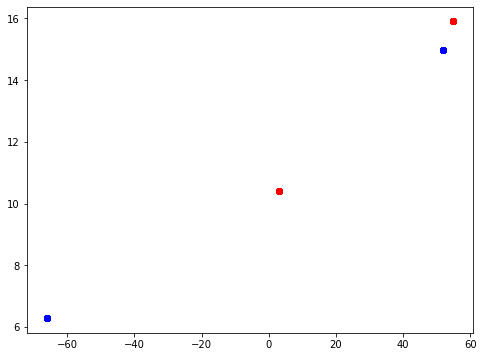

In [552]:
plt.scatter(
    tsne.embedding_[df_telecom_2['Churn'].values, 0],
    tsne.embedding_[df_telecom_2['Churn'].values, 1],
    color='red',
);
plt.scatter(
    tsne.embedding_[~df_telecom_2['Churn'].values, 0],
    tsne.embedding_[~df_telecom_2['Churn'].values, 1],
    color='blue',
);